---

# Python dependences

In [90]:
!pip install scikit-learn

---

# EXERCISE 1: Search of the best C

Create a SVM with linear kernel using the scikit-learn library.

Verify the performance with different values of the hyperparameter C using the function [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), nel range -20:0:20 (i.e., start=-20, stop = 0, num=20) on digits dataset.

> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset.

> __QUESTION 1(b):__ Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis ((mean and standard deviation). Suggestion: Use the log-scale.

> __QUESTION 1(c):__ Train and test the model on the digits dataset with the best configuration found at the previous step


In [91]:
# importazioni
from sklearn import datasets # per digit dataset
from sklearn import svm # per support vector machine
from sklearn.model_selection import train_test_split # per train e test dataset
from sklearn.model_selection import cross_val_score # per k-fold-validation
import matplotlib.pyplot as plt # per stampa grafico risultati
import numpy as np # per funzione logspace e reshape

for c = 1.00e-20 - fit: 0.1000 - mean: 0.1537 - std: 0.0740
for c = 1.13e-19 - fit: 0.1000 - mean: 0.1537 - std: 0.0740
for c = 1.27e-18 - fit: 0.1000 - mean: 0.1537 - std: 0.0740
for c = 1.44e-17 - fit: 0.1000 - mean: 0.1537 - std: 0.0740
for c = 1.62e-16 - fit: 0.1000 - mean: 0.1596 - std: 0.0824
for c = 1.83e-15 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 2.07e-14 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 2.34e-13 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 2.64e-12 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 2.98e-11 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 3.36e-10 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 3.79e-09 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 4.28e-08 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 4.83e-07 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 5.46e-06 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 6.16e-05 - fit: 0.1000 - mean: 0.1589 - std: 0.0814
for c = 6.95e-04 - fit: 0.1000 - mean: 0

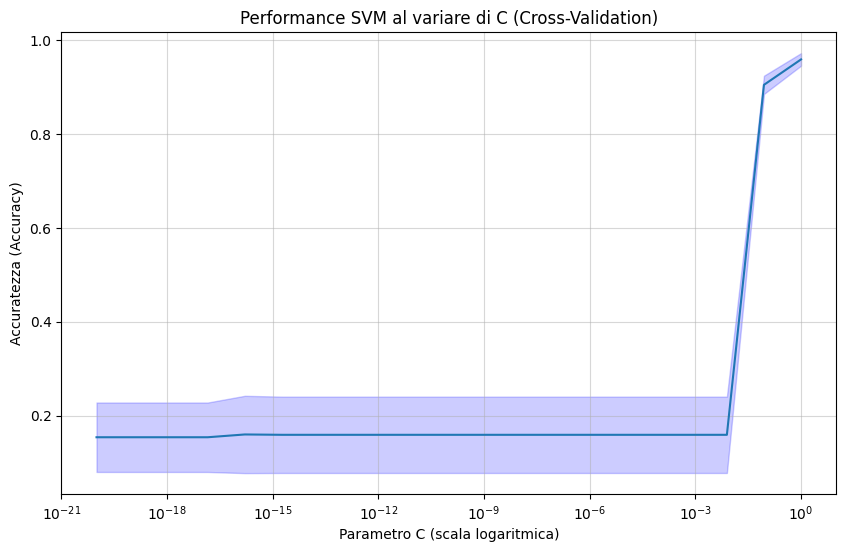

best_c: 1.0  - score: 0.9488888888888889


In [92]:
# ----- DATASET -----
# carico il digit dataset
digits_data = datasets.load_digits()

# converto il dataset nel formato corretto
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))

# divido il dataset in train e test dataset
X_train, X_test, y_train, y_test = train_test_split(data, digits_data.target, test_size=0.25, shuffle=False)

# ----- PARAMETRI di ANALISI PRESTAZIONI -----
mean_scores = []
std_scores = []
c_values = []

best_c = 0
best_c_mean_score = 0

# ------ FITTING CON DIVERSI VALORI DI C -----
# per valori di C da -20 a 0 per totale di 20 valori
for c in np.logspace(-20,0,20):

    # creo il classificatore svm usando un valore di c
    clf = svm.SVC(C=c)

    # alleno il classificatore con i dati di train del dataset
    clf.fit(X_train,y_train)

    # calcolo dello score dal fit effettuato senza cross validation
    score = clf.score(X_test, y_test)

    # test attraverso la 3-fold cross validation
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    c_values.append(c)
    if best_c_mean_score < scores.mean():
        best_c = c
        best_c_mean_score = scores.mean()

    # stampo i punteggi per ogni valore di C
    print("for c = %0.2e - fit: %0.4f - mean: %0.4f - std: %0.4f" % (c, score, scores.mean(), scores.std()))

print("best_c =", best_c, " - score:", best_c_mean_score)

# ----- STAMPA GRAFICO di MEDIA e VARIANZA degli SCORES -----
# conversione vettori in numpy array per facilitare i calcoli nel grafico
mean_scores = np.array(mean_scores)
std_scores = np.array(std_scores)

# creazione del grafico
plt.figure(figsize=(10, 6))

# grafico dei valori con asse x in scala logaritmica
plt.semilogx(c_values, mean_scores)

# aggiunta della deviazione standard, alpha=0.2 rende l'area semi-trasparente
plt.fill_between(c_values, mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, color='blue')

# abbellimenti del grafico
plt.title('Performance SVM al variare di C (Cross-Validation)')
plt.xlabel('Parametro C (scala logaritmica)')
plt.ylabel('Accuratezza (Accuracy)')
plt.grid(True, which="both", ls="-", alpha=0.5)

# stampa grafico
plt.show()

# ----- ADDESTRAMENTO e TEST con MIGLIOR VALORE DI C
# creazione classificatore
clf_final = svm.SVC(C=best_c)

# allenamento con dataset di train
clf_final.fit(X_train, y_train)

# calcolo score con dataset di test
print("best_c:", best_c, " - score:", clf_final.score(X_test, y_test))

---

# EXERCISE 2: SVM on the iris_dataset

Load the iris dataset from the dataset available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

> __QUESTION 2(a):__  Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset.

> __QUESTION 2(b):__ Split the dataset in training and test according to the following percentages: 70% - 30%

> __QUESTION 2(c):__ Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

> __QUESTION 2(d):__ Test the achieved models on the test set

> __QUESTION 2(e):__ Represent the performances achieved for each kernel in the form of confusion matrix


In [93]:
# importazioni
from sklearn import datasets # per digit dataset
from sklearn import svm # per support vector machine
from sklearn.model_selection import train_test_split # per dividere dataset in train e test
from sklearn.model_selection import cross_val_score # per k-fold-validation
import sklearn.metrics # per confusion matrix
import numpy as np # per funzione logspace e reshape

n_samples: 150
classes: [0 1 2]
lin_scores: 1.0
rbf_scores: 0.9777777777777777
pol_scores: 0.9777777777777777


Text(0.5, 0.98, 'Confusion Matrix for Polinomial Kernel')

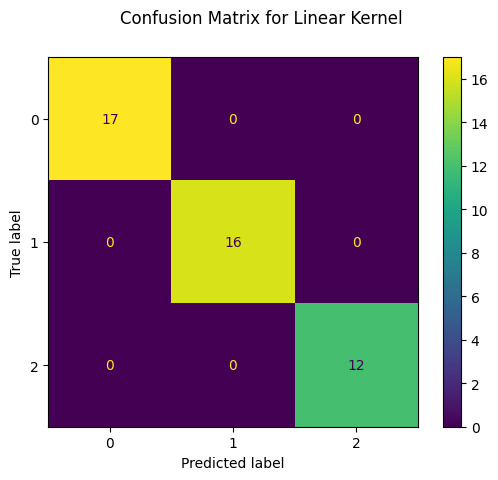

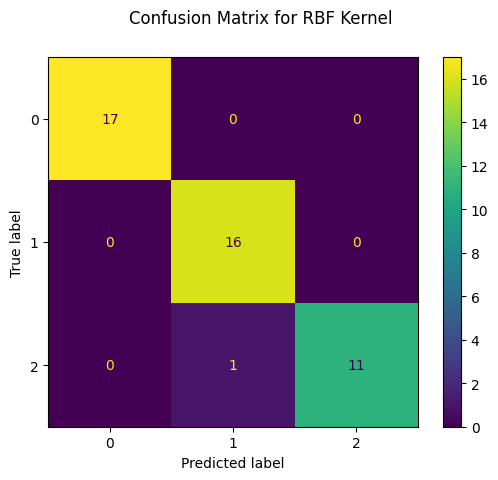

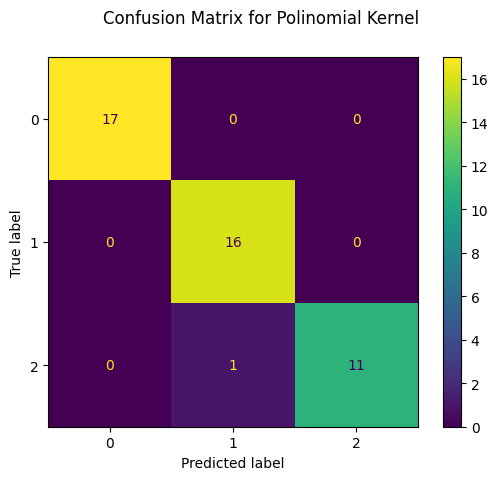

In [94]:
# ----- DATASET -----
# recupero dataset
iris_data = datasets.load_iris()

# stampa numero di elementi nel dataset
print("n_samples:", len(iris_data.data))

# stampa classi del dataset
print("classes:", np.unique(iris_data.target))

# separazione training e testing datasets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3)

# ----- ADDESTRAMENTO CON DIVERSI KERNEL-----
# kernel lineare
clf_lin = svm.SVC(kernel="linear") # definizione classificatore
clf_lin.fit(X_train, y_train) # addestramento
print("lin_scores:", clf_lin.score(X_test,y_test)) # recupero accuratezza
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, clf_lin.predict(X_test)) # confuion matrix
disp.figure_.suptitle("Confusion Matrix for Linear Kernel")

# kernel rbf
clf_rbf = svm.SVC(kernel="rbf") # definizione classificatore
clf_rbf.fit(X_train, y_train) # addestramento
print("rbf_scores:", clf_rbf.score(X_test,y_test)) # recupero accuratezza
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, clf_rbf.predict(X_test)) # confuion matrix
disp.figure_.suptitle("Confusion Matrix for RBF Kernel")

# kernel polinomial
clf_pol = svm.SVC(kernel="poly") # definizione classificatore
clf_pol.fit(X_train, y_train) # addestramento
print("pol_scores:", clf_pol.score(X_test,y_test)) # recupero accuratezza
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, clf_pol.predict(X_test)) # confuion matrix
disp.figure_.suptitle("Confusion Matrix for Polinomial Kernel")